In [421]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [422]:
cat_cpi = pd.read_csv("CPI_Data/Cat_CPI&PPI/Cat_CPI.csv")
cat_cpi.set_index(pd.to_datetime(cat_cpi['Time'], format = '%Y%m'), inplace = True)
cat_cpi.drop(['Time'], axis = 1, inplace = True)
cat_cpi

,Food,Energy,Apparel,New vehicles,Medical care commodities,Tobacco and smoking products,Shelter,Transportation services
Time,,,,,,,,
2012-03-01,232.792,253.599,127.258,144.350,333.188,845.760,255.609,270.604
2012-04-01,233.234,255.736,128.485,144.522,333.060,847.032,256.031,272.146
2012-05-01,233.339,250.306,127.688,144.401,333.131,845.622,256.442,272.912
2012-06-01,233.563,244.167,125.241,144.367,333.348,849.078,256.950,273.239
2012-07-01,233.630,239.972,122.300,143.953,335.048,858.730,257.409,272.860
...,...,...,...,...,...,...,...,...
2021-08-01,279.135,246.639,121.194,158.652,375.685,1254.492,336.284,325.652
2021-09-01,281.506,248.228,123.406,160.244,376.842,1263.542,337.451,321.673
2021-10-01,284.205,255.338,124.323,162.527,379.003,1287.067,338.671,323.903


In [423]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)

In [424]:
columns = cat_cpi.columns
for idx in range(cat_cpi.shape[1]):
    print(columns[idx])
    ind = cat_cpi.iloc[:, idx]
    adf_test(ind)
    print('\n')

Food
1. ADF :  2.2015850349133337
2. P-Value :  0.9988838066526566
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 105
5. Critical Values :
	 1% :  -3.4942202045135513
	 5% :  -2.889485291005291
	 10% :  -2.5816762131519275


Energy
1. ADF :  -2.5940258985873426
2. P-Value :  0.09423828973712362
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 116
5. Critical Values :
	 1% :  -3.4880216384691867
	 5% :  -2.8867966864160075
	 10% :  -2.5802408234244947


Apparel
1. ADF :  -1.8477040362530937
2. P-Value :  0.3570481195785644
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 105
5. Critical Values :
	 1% :  -3.4942202045135513
	 5% :  -2.889485291005291
	 10% :  -2.5816762131519275


New vehicles
1. ADF :  1.6197736740164312
2. P-Value :  0.9979157027200924
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression and Criti

In [443]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

stepwise_fit = auto_arima(cat_cpi['Energy'],
                          suppress_warnings=True)

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  118
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -363.402
Date:                Wed, 02 Mar 2022   AIC                            730.804
Time:                        19:47:11   BIC                            736.328
Sample:                             0   HQIC                           733.047
                                - 118                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5247      0.080      6.528      0.000       0.367       0.682
sigma2        29.1187      3.866      7.532      0.000      21.541      36.696
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 0.04
Prob(Q):                              0.70   Prob(JB):                         0.98
Heteroskedasticity (H):               0.67   Skew:                            -0.04
Prob(H) (two-sided):                  0.21   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [444]:
cat_cpi.shape[0]

118

In [445]:
X = cat_cpi['Energy']
train = X.iloc[:-10]
test = X.iloc[-10:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(108,) (10,)
225.861 256.207


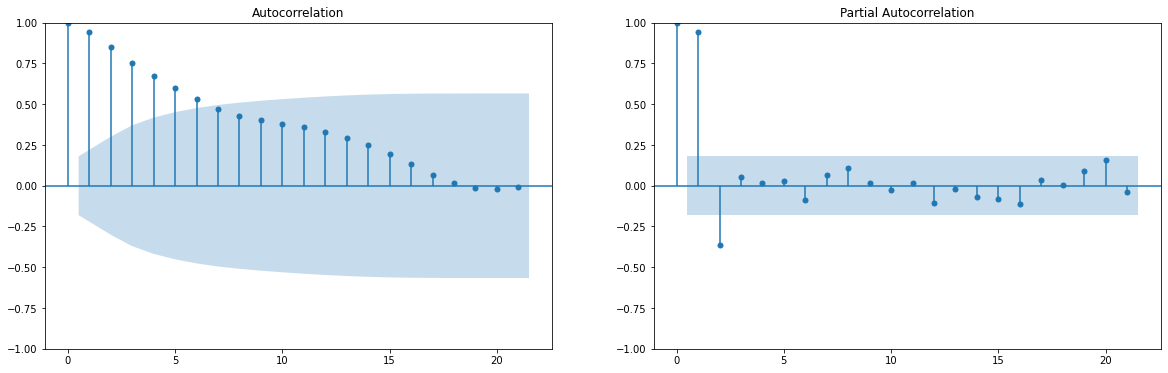

In [446]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
plot_acf(X, ax = ax1)
plot_pacf(X, ax = ax2, method='ywmle')
plt.show()

In [450]:
model=SARIMAX(X,order=(0,1,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Energy   No. Observations:                  118
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -363.402
Date:                Wed, 02 Mar 2022   AIC                            730.804
Time:                        19:50:08   BIC                            736.328
Sample:                    03-01-2012   HQIC                           733.047
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5247      0.080      6.528      0.000       0.367       0.682
sigma2        29.1187      3.866      7.532      0.000      21.541      36.696
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 0.04
Prob(Q):                              0.70   Prob(JB):                         0.98
Heteroskedasticity (H):               0.67   Skew:                            -0.04
Prob(H) (two-sided):                  0.21   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [451]:
start= len(train)
end=len(train)+len(test)-1

index_future_dates = pd.date_range(start='2021-09',end='2021-12', freq='M')
pred = model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')

In [452]:
preds = pd.concat([train, test], axis = 0)

<AxesSubplot:xlabel='Time'>

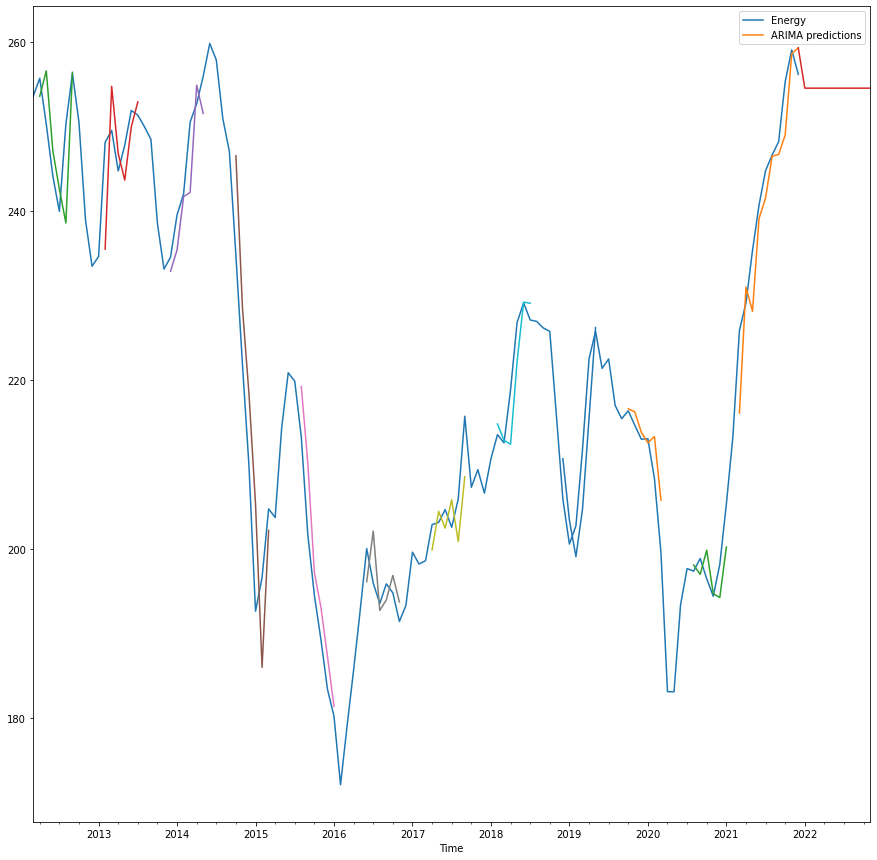

In [453]:
fig, ax = plt.subplots(1,1, figsize=(15,15))
preds.plot(legend = True, ax = ax)
pred.plot(legend=True, ax=ax)
for i in np.arange(1, train.shape[0], 10):
    pred_r = model.predict(start=i, end = i+5, typ='level')
    pred_r.plot(legend=False, ax=ax)
pred_f = model.predict(start=X.shape[0]-1,end=X.shape[0]+10,typ='levels').rename('ARIMA predictions')
pred_f.plot(ax=ax)

In [454]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test_mean = test.mean()
rmse=sqrt(mean_squared_error(pred,test))
print(rmse)
print(rmse / test_mean)

4.650746865393146
0.019049913676350717


In [461]:
model2 = model=SARIMAX(X,seasonal_order=(2,0,0,12))
model2=model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             Energy   No. Observations:                  118
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 12)   Log Likelihood                -384.481
Date:                            Wed, 02 Mar 2022   AIC                            776.963
Time:                                    20:03:19   BIC                            788.045
Sample:                                03-01-2012   HQIC                           781.462
                                     - 12-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9995      0.004    281.269      0.000       0.993       1.007
ar.S.L12       0.1355      0.110      1.236      0.217      -0.079       0.351
ar.S.L24       0.0918      0.106      0.869      0.385      -0.115       0.299
sigma2        37.0052      5.124      7.222      0.000      26.962      47.048
===================================================================================
Ljung-Box (L1) (Q):                  23.60   Jarque-Bera (JB):                 4.36
Prob(Q):                              0.00   Prob(JB):                         0.11
Heteroskedasticity (H):               0.86   Skew:                            -0.45
Prob(H) (two-sided):                  0.65   Kurtosis:                         3.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [464]:
pred2 = model2.predict(start=start,end=end,typ='levels').rename('SARIMAX predictions')

<AxesSubplot:xlabel='Time'>

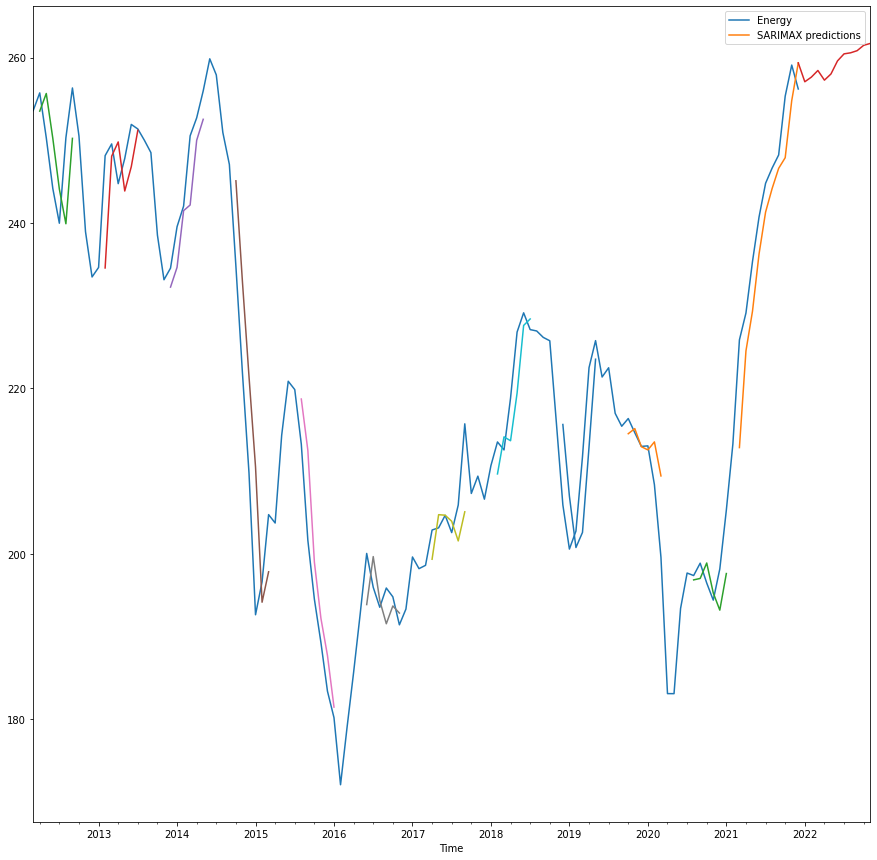

In [465]:
fig2, ax2 = plt.subplots(1,1, figsize=(15,15))
preds.plot(legend = True, ax = ax2)
pred2.plot(legend=True, ax=ax2)
for i in np.arange(1, train.shape[0], 10):
    pred_r = model2.predict(start=i, end = i+5, typ='level')
    pred_r.plot(legend=False, ax=ax2)
pred_f = model2.predict(start=X.shape[0]-1,end=X.shape[0]+10,typ='levels').rename('SARIMAX predictions')
pred_f.plot(ax=ax2)

In [467]:
test_mean = test.mean()
rmse=sqrt(mean_squared_error(pred2,test))
print(rmse)
print(rmse / test_mean)

5.928046341699254
0.02428185716128653
